# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

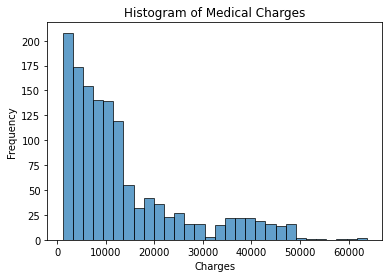

Mean of charges: 13270.422265141257
Standard deviation of charges: 12110.011236693994


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('insurance2.csv')

# Plotting the histogram of charges
plt.hist(data['charges'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Medical Charges')
plt.show()

# Calculating the mean and standard deviation of the charges
mean_charges = np.mean(data['charges'])
std_charges = np.std(data['charges'], ddof=1)  # Using ddof=1 for sample standard deviation

print("Mean of charges:", mean_charges)
print("Standard deviation of charges:", std_charges)


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

In [2]:
from scipy.stats import ttest_1samp

# Define the threshold value (i.e., hypothesized population mean)
threshold = 12000

# Perform the one-sample t-test
t_stat, p_value = ttest_1samp(data['charges'], threshold)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation of the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The average charge has likely fallen below $12,000.")
else:
    print("Fail to reject the null hypothesis: Not enough evidence that the average charge has fallen below $12,000.")


T-statistic: 3.8373517196585314
P-value: 0.000130171652092872
Reject the null hypothesis: The average charge has likely fallen below $12,000.


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [3]:
import scipy.stats as st
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('insurance2.csv')

# Calculate the sample mean and standard deviation
sample_mean = np.mean(data['charges'])
sample_std = np.std(data['charges'], ddof=1)  # Using ddof=1 for sample standard deviation
n = len(data)

# Significance level for one-sided 95% confidence interval
alpha = 0.05  # 95% confidence level (one-sided)

# Degrees of freedom
df = n - 1

# Calculate the critical value (one-sided t critical value)
t_critical = st.t.ppf(1 - alpha, df)

# Calculate the margin of error
margin_of_error = t_critical * (sample_std / np.sqrt(n))

# One-sided lower confidence interval
lower_bound = sample_mean - margin_of_error

print("Critical value (t_critical):", t_critical)
print("One-sided 95% Confidence Interval Lower Bound:", lower_bound)

# Interpretation
threshold = 12000
if lower_bound < threshold:
    print("The administrator should be concerned: The lower bound of the confidence interval is below $12,000.")
else:
    print("The administrator should not be concerned: The lower bound of the confidence interval is above $12,000.")


Critical value (t_critical): 1.6459941145571317
One-sided 95% Confidence Interval Lower Bound: 12725.48718381623
The administrator should not be concerned: The lower bound of the confidence interval is above $12,000.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

In [8]:
import numpy as np
import pandas as pd
from scipy.stats import t

# Step 1: Load the dataset
data = pd.read_csv('insurance2.csv')

# Step 2: Display the column names to identify the correct names
print("Columns in the dataset:", data.columns)

# Step 3: Display the first few rows to understand the data structure
print("\nFirst few rows of the dataset:")
print(data.head())

try:
    # Step 4: Split the data into insured and uninsured groups based on insurance claim status
    # Here, we assume 'insuranceclaim' with value 1 indicates insured, and 0 indicates uninsured
    insured = data[data['insuranceclaim'] == 1]['charges']
    uninsured = data[data['insuranceclaim'] == 0]['charges']

    # Step 5: Calculate sample sizes, means, and standard deviations
    n0 = len(insured)
    n1 = len(uninsured)

    mean_0 = np.mean(insured)
    mean_1 = np.mean(uninsured)

    std_0 = np.std(insured, ddof=1)
    std_1 = np.std(uninsured, ddof=1)

    # Step 6: Calculate the pooled standard deviation
    sp = np.sqrt(((n0 - 1) * std_0**2 + (n1 - 1) * std_1**2) / (n0 + n1 - 2))

    # Step 7: Calculate the t-statistic
    t_stat = (mean_0 - mean_1) / (sp * np.sqrt((1 / n0) + (1 / n1)))

    # Print the pooled standard deviation and t-statistic
    print("\nPooled Standard Deviation (s_p):", sp)
    print("T-statistic:", t_stat)

    # Step 8: Calculate the p-value for the two-tailed test
    df = n0 + n1 - 2  # Degrees of freedom
    p_value = t.sf(np.abs(t_stat), df=df) * 2  # Two-tailed p-value

    print("P-value:", p_value)

    # Interpretation of the result
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference in charges between insured and uninsured patients.")
    else:
        print("Fail to reject the null hypothesis: Not enough evidence of a difference in charges between insured and uninsured patients.")

except KeyError as e:
    print(f"KeyError: {e}. Please ensure you are using the correct column names.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")


Columns in the dataset: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

First few rows of the dataset:
   age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1

Pooled Standard Deviation (s_p): 11520.034268775256
T-statistic: 11.89329903087671
P-value: 4.461230231620972e-31
Reject the null hypothesis: There is a significant difference in charges between insured and uninsured patients.


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [9]:
import numpy as np
import pandas as pd
from scipy.stats import t, ttest_ind

# Step 1: Load the dataset
data = pd.read_csv('insurance2.csv')

# Step 2: Split the data into insured and uninsured groups based on insurance claim status
insured = data[data['insuranceclaim'] == 1]['charges']
uninsured = data[data['insuranceclaim'] == 0]['charges']

# Step 3: Calculate sample sizes, means, and standard deviations
n0 = len(insured)
n1 = len(uninsured)

mean_0 = np.mean(insured)
mean_1 = np.mean(uninsured)

std_0 = np.std(insured, ddof=1)
std_1 = np.std(uninsured, ddof=1)

# Step 4: Calculate the pooled standard deviation
sp = np.sqrt(((n0 - 1) * std_0**2 + (n1 - 1) * std_1**2) / (n0 + n1 - 2))

# Step 5: Calculate the t-statistic manually
t_stat_manual = (mean_0 - mean_1) / (sp * np.sqrt((1 / n0) + (1 / n1)))

# Step 6: Calculate the p-value for the two-tailed test manually
df = n0 + n1 - 2  # Degrees of freedom
p_value_manual = t.sf(np.abs(t_stat_manual), df=df) * 2  # Two-tailed p-value

# Step 7: Perform the t-test using scipy.stats function
t_stat_scipy, p_value_scipy = ttest_ind(insured, uninsured, equal_var=True)

# Displaying the results
print("Manual t-statistic:", t_stat_manual)
print("Manual p-value:", p_value_manual)
print("Scipy t-statistic:", t_stat_scipy)
print("Scipy p-value:", p_value_scipy)


Manual t-statistic: 11.89329903087671
Manual p-value: 4.461230231620972e-31
Scipy t-statistic: 11.893299030876712
Scipy p-value: 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

In [10]:
import numpy as np
from scipy.stats import norm

# Sample data
sample_mean = 75
population_mean = 80
population_std = 10
sample_size = 50

# Calculate the z-statistic
z_stat = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

# Calculate the p-value (two-tailed test)
p_value = 2 * norm.cdf(-abs(z_stat))

print("Z-statistic:", z_stat)
print("P-value:", p_value)


Z-statistic: -3.5355339059327378
P-value: 0.0004069520174449578


__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test